In [1]:
# To see where the company fails or succeeds
# Imbalanced classification problem
# Many features - Regularization required

In [2]:
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# scikitlearn imports

## Reading the Data

In [3]:
file_path = Path('/home/device1/predictive_ml/datasets/bankruptcy_data.csv')
if file_path.exists() and file_path.suffix == '.csv':
    df = pd.read_csv(file_path)

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [5]:
# Total number of missing values is 0
int(df.isnull().sum().sum())

0

In [6]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
# The feature/column names should be in lowercase and separated by underscore all the time
column_clean_func = lambda x : x.strip().lower().replace(' ', '_')

df.columns = [column_clean_func(col) for col in df.columns]

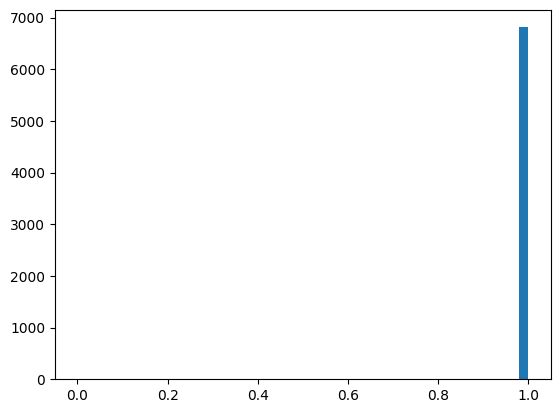

In [8]:
# Not all the columns will be normally distributed
# Operating Profit Rate 
plt.hist(df['operating_profit_rate'], bins=50)
plt.show()

## Exploring the Dataset

In [10]:
# the columns seeems to be fine after editing
df.columns[:5]

Index(['bankrupt?', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

In [15]:
# Lets see if the integer columns are actually like a categorical
# net_income_flag can be removed
# the bankrupt? flag is the target class
# 
numerical_cols_int = [col for col in df.columns if df[col].dtype == 'int']
numerical_cols_float = [col for col in df.columns if df[col].dtype=='float']

for col in numerical_cols_int:
    print(f'{col} - Number of unique values : {df[col].nunique()}')

bankrupt? - Number of unique values : 2
liability-assets_flag - Number of unique values : 2
net_income_flag - Number of unique values : 1


### Number of outliers

In [43]:
def calculate_num_outliers(feature_name : str) -> tuple:
    """."""
    try:
        # Calculate the upper and lower limits
        Q1 = df[feature_name].quantile(0.25)
        Q3 = df[feature_name].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        # Create arrays of Boolean values indicating the outlier rows
        upper_df = df[df[feature_name] >=upper]
        lower_df = df[df[feature_name] <=lower]
        # upper_array = np.where(df['bmi'] >= upper)[0]
        # lower_array = np.where(df['bmi'] <= lower)[0]
        num_outliers = upper_df.shape[0] + lower_df.shape[0]
        return 'success', feature_name, num_outliers
        
    except Exception as e:
        return str(e), feature_name, None

def get_feature_wise_outliers():
    """."""
    try:
        outlier_df_data = []
        for col in df.columns:
            if col in numerical_cols_float:
                msg, feature_name, num_outliers = calculate_num_outliers(col)
                outlier_df_data.append([msg, feature_name, num_outliers])
            else:
                pass

        return outlier_df_data
    except Exception as e:
        print(str(e))

outlier_df_data = get_feature_wise_outliers()

In [44]:
outlier_df = pd.DataFrame(outlier_df_data, columns = ['msg', 'feature_name', 'num_outliers'])
outlier_df.drop(columns=['msg'], inplace=True)
outlier_df['outlier_percentage'] = round(outlier_df['num_outliers'] / df.shape[0] * 100, 2)

In [45]:
# Most features have outliers which makes different outlier techniques essential
outlier_df.sort_values('outlier_percentage').reset_index(drop = True).sample(20)

,feature_name,num_outliers,outlier_percentage
61,accounts_receivable_turnover,659,9.66
62,total_asset_return_growth_rate_ratio,674,9.88
74,after-tax_net_interest_rate,867,12.71
90,fixed_assets_turnover_frequency,1418,20.79
64,operating_profit_rate,716,10.50
36,total_income/total_expense,463,6.79
12,current_liability_to_assets,95,1.39
52,cash_flow_rate,576,8.45
11,working_capital_to_total_assets,75,1.10
87,interest_expense_ratio,1362,19.97


In [46]:
outlier_df.sort_values('outlier_percentage').reset_index(drop = True)[-10:]

,feature_name,num_outliers,outlier_percentage
83,cash_flow_to_sales,1052,15.43
84,non-industry_income_and_expenditure/revenue,1094,16.04
85,no-credit_interval,1139,16.70
86,cash_flow_to_liability,1212,17.77
87,interest_expense_ratio,1362,19.97
88,total_asset_growth_rate,1381,20.25
89,current_asset_turnover_rate,1399,20.52
90,fixed_assets_turnover_frequency,1418,20.79
91,interest_coverage_ratio_(interest_expense_to_e...,1421,20.84
92,degree_of_financial_leverage_(dfl),1503,22.04


### Lets check if the outliers have some connection with the target class

In [47]:
def calculate_outliers_df(feature_name : str) -> tuple:
    """."""
    try:
        # Calculate the upper and lower limits
        Q1 = df[feature_name].quantile(0.25)
        Q3 = df[feature_name].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        # Create arrays of Boolean values indicating the outlier rows
        upper_df = df[df[feature_name] >=upper]
        lower_df = df[df[feature_name] <=lower]
        
        outlier_df = pd.concat([upper_df, lower_df], axis=0)
        # num_outliers = upper_df.shape[0] + lower_df.shape[0]
        return 'success', feature_name, outlier_df
        
    except Exception as e:
        return str(e), feature_name, None

def get_outliers(feature_name : str) -> tuple:
    """."""
    try:
        msg, feature_name, outlier_df = calculate_outliers_df(feature_name)
        if msg!= 'success':
            return msg, None
        else:
            return 'success', outlier_df

    except Exception as e:
        return str(e), None



#### Feature - Degree of Financial Leverage

In [48]:
# For feature of degree_of_financial_leverage(dfl)
# outliers in df
msg, outliers_feature_df = get_outliers('degree_of_financial_leverage_(dfl)')


In [49]:
# Clearly when there are more outliers we get a much a higher percentage of target class ==1
# 7% vs 3%
outliers_feature_df['bankrupt?'].value_counts()

bankrupt?
0    1386
1     117
Name: count, dtype: int64

In [50]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

#### Feature - Fixed assets

In [54]:
outlier_df.sort_values('outlier_percentage').reset_index(drop = True)[-10:]

,feature_name,num_outliers,outlier_percentage
83,cash_flow_to_sales,1052,15.43
84,non-industry_income_and_expenditure/revenue,1094,16.04
85,no-credit_interval,1139,16.70
86,cash_flow_to_liability,1212,17.77
87,interest_expense_ratio,1362,19.97
88,total_asset_growth_rate,1381,20.25
89,current_asset_turnover_rate,1399,20.52
90,fixed_assets_turnover_frequency,1418,20.79
91,interest_coverage_ratio_(interest_expense_to_e...,1421,20.84
92,degree_of_financial_leverage_(dfl),1503,22.04


In [65]:
# For feature of degree_of_financial_leverage(dfl)
# outliers in df
msg, outliers_feature_df = get_outliers('fixed_assets_turnover_frequency')

# Here the number of outliers does not seem to matter much
# Even in this case the number of outliers is higher
outliers_feature_df['bankrupt?'].value_counts()

bankrupt?
0    1329
1      89
Name: count, dtype: int64

In [66]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

(6.357142857142857, 3.3333333333333335)

#### Feature - Current Asset turonver rate

In [75]:
# For feature of degree_of_financial_leverage(dfl)
# outliers in the feature df

# Here this does not make much of an impact
msg, outliers_feature_df = get_outliers('current_asset_turnover_rate')
if msg != 'success':
    print(f'error : {msg}')
    

# Here the number of outliers does not seem to matter much
# Even in this case the number of outliers is higher
outliers_feature_df['bankrupt?'].value_counts()

bankrupt?
0    1330
1      69
Name: count, dtype: int64

In [76]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [80]:
69/1400 * 100, 220 / 6800 * 100

(4.928571428571429, 3.2352941176470593)

#### Feature - total_asset_growth_rate

In [82]:
# For feature of degree_of_financial_leverage(dfl)
# outliers in the feature df

# Here the target class actually has less of an impact
msg, outliers_feature_df = get_outliers('total_asset_growth_rate')
if msg != 'success':
    print(f'error : {msg}')
    

# Here the number of outliers does not seem to matter much
# Even in this case the number of outliers is higher
outliers_feature_df['bankrupt?'].value_counts()

bankrupt?
0    1348
1      33
Name: count, dtype: int64

In [83]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [84]:
33/1400 * 100, 220 / 6800 * 100

(2.357142857142857, 3.2352941176470593)

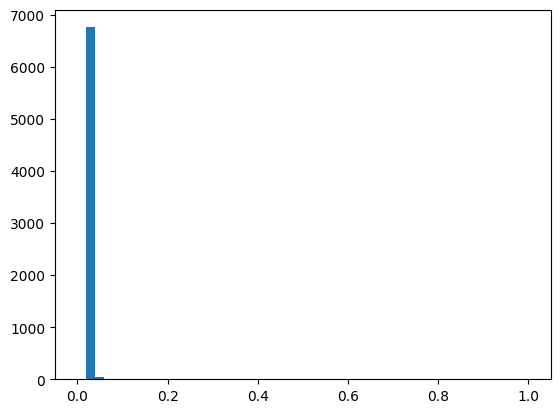

In [27]:
plt.hist(df['degree_of_financial_leverage_(dfl)'], bins=50)
plt.show()

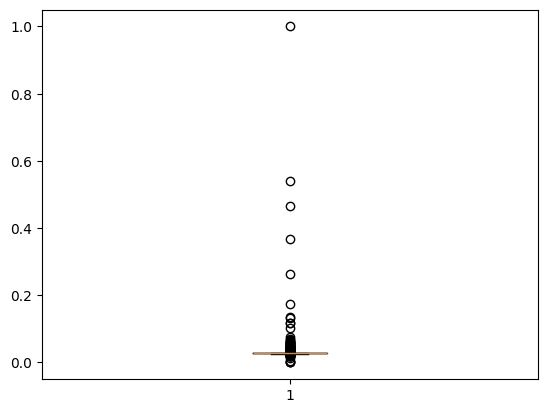

In [30]:
plt.boxplot(df['degree_of_financial_leverage_(dfl)'])
plt.show()

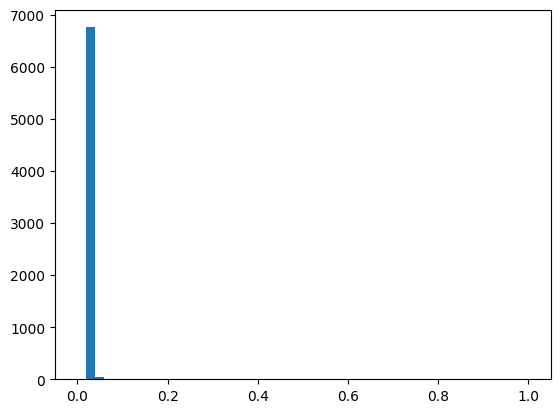

In [28]:
plt.hist(df['degree_of_financial_leverage_(dfl)'], bins=50)
plt.show()

In [17]:
df.describe()

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [18]:
# check max values of this dataset 
# They should all be 1
# No feature should be more than 1 
def check_min_max_values() -> tuple:
    """."""
    try:
        min_max_scaled_cols_true = []
        min_max_scaled_cols_false = []
        df_describe_stats = df.describe().copy()
        df_describe_stats = df.describe().copy()
        flag_min_max = 1
        for col in df_describe_stats:
            min = df_describe_stats[col]['min']
            max = df_describe_stats[col]['max']
            if min!=0.0 or max!=1.0:
                flag_min_max = 0
                min_max_scaled_cols_false.append(col)
            elif min==0.0 and max==0.0:
                min_max_scaled_cols_true.append(col)

        return 'success', min_max_scaled_cols_true, min_max_scaled_cols_false
    
    except Exception as e:
        return str(e), None, None
    
# float(df.describe().operating_profit_rate['max'])

In [19]:
msg, min_max_scaled_cols_true, min_max_scaled_cols_false = check_min_max_values()
if msg!= 'success':
    print(msg)
else:
    print(min_max_scaled_cols_false)

['operating_expense_rate', 'research_and_development_expense_rate', 'interest-bearing_debt_interest_rate', 'revenue_per_share_(yuan_¥)', 'total_asset_growth_rate', 'net_value_growth_rate', 'current_ratio', 'quick_ratio', 'total_debt/total_net_worth', 'accounts_receivable_turnover', 'average_collection_days', 'inventory_turnover_rate_(times)', 'fixed_assets_turnover_frequency', 'revenue_per_person', 'allocation_rate_per_person', 'quick_assets/current_liability', 'cash/current_liability', 'inventory/current_liability', 'long-term_liability_to_current_assets', 'current_asset_turnover_rate', 'quick_asset_turnover_rate', 'cash_turnover_rate', 'fixed_assets_to_assets', 'total_assets_to_gnp_price', 'net_income_flag']


In [20]:
df.head()

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

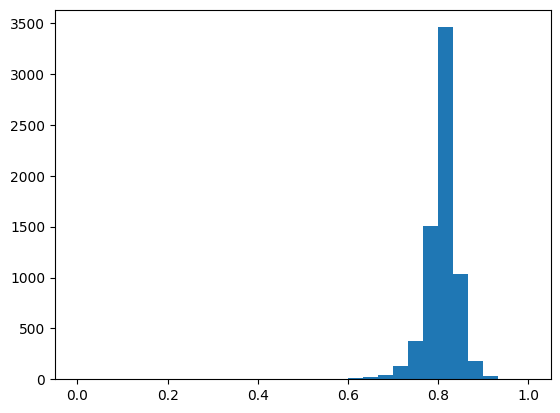

In [23]:
plt.hist(df['net_income_to_total_assets'], bins = 30)
plt.show()

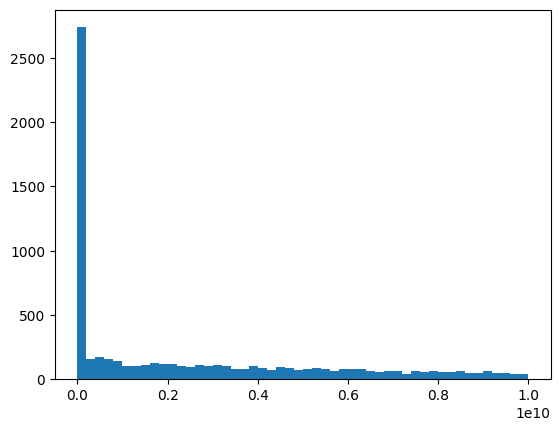

In [24]:
plt.hist(df['cash_turnover_rate'], bins = 50)
plt.show()

In [126]:
df.describe()['average_collection_days']

count    6.819000e+03
mean     9.826221e+06
std      2.563589e+08
min      0.000000e+00
25%      4.386530e-03
50%      6.572537e-03
75%      8.972876e-03
max      9.730000e+09
Name: average_collection_days, dtype: float64

In [121]:
df.describe()['operating_expense_rate']

count    6.819000e+03
mean     1.995347e+09
std      3.237684e+09
min      0.000000e+00
25%      1.566874e-04
50%      2.777589e-04
75%      4.145000e+09
max      9.990000e+09
Name: operating_expense_rate, dtype: float64

In [106]:
df.describe()['bankrupt?']

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: bankrupt?, dtype: float64

In [78]:
def find_normally_distributed_features() -> tuple:
    """."""
    try:
        df_describe_stats = df.describe()

    except Exception as e:
        print(str(e))

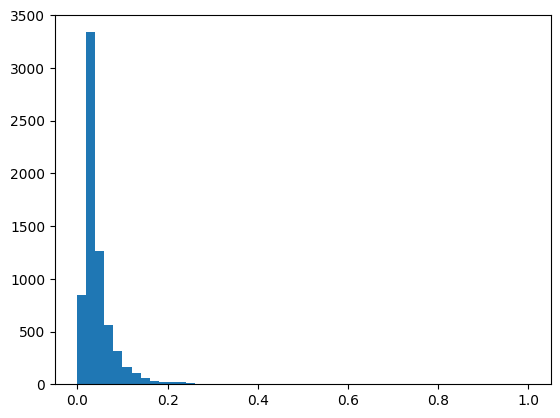

In [17]:
# Right skewed graph
plt.hist(df[' Equity to Liability'], bins=50)
plt.show()

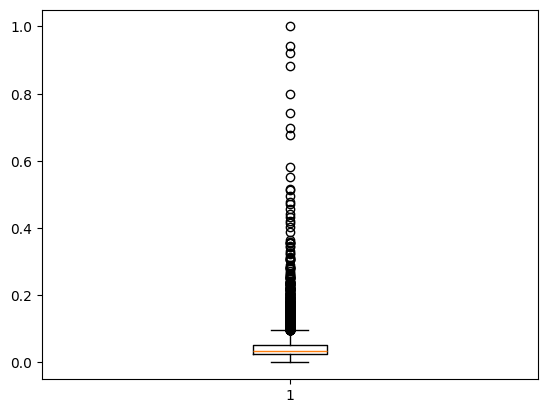

In [18]:

plt.boxplot(df[' Equity to Liability'])
plt.show()

## Feature Selection

In [ ]:
df.head()

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

# FOr the inputs
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


label_encoders = {}
# for the train_dataset
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # Save encoder


# for the test dataset 
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc, y_test_enc

In [ ]:
def feature_selector_chi2_categorical(X_train = None, y_train = None) -> tuple:
    """
    Chi2 feature selector
    Here unfortunately what has happened is that all features have been evaluated including the numerical ones
    """
    try:
        if not (X_train.empty and y_train.empty):
            feature_selector_KBest = SelectKBest(score_func=chi2, k='all')
            feature_selector_KBest.fit(X_train, y_train)
            X_train_fs = feature_selector_KBest.transform(X_train)
            X_test_fs = feature_selector_KBest.transform(X_test)
            return 'success', X_train_fs, X_test_fs, feature_selector_KBest
        else:
            raise ValueError('Features/Targets are empty')

    except ValueError as val_error:
        return val_error, None, None, None
    except Exception as e:
        return str(e), None, None, None

def get_results_categorical(X_train, y_train) -> str:
    """
    Can be performed with Chi2 and Mutual Information Score
    """
    try:
        msg, X_train_fs, X_test_fs, feature_selector_KBest=feature_selector_chi2_categorical(X_train, y_train)
        if msg!= 'success':
            print(msg)
        else:
            for i in range(len(feature_selector_KBest.scores_)):
                print(f'Feature {X_train.columns[i]} score : {feature_selector_KBest.scores_[i]}')
                # plot the scores

            plt.bar(X_train.columns, feature_selector_KBest.scores_)
            plt.xticks(rotation = 90)
            plt.show()
    
        return 'success'
    except Exception as e:
        print(str(e))

get_results_categorical(X_train, y_train)

In [20]:
def feature_selector_MutualInfo_numerical(X_train = None, y_train = None) -> tuple:
    """
    Mutual Info feature selector
    Mutual Infor should be used for numerical and categorical features
    """
    try:
        if not (X_train.empty and y_train.empty):
            feature_selector_KBest = SelectKBest(score_func=mutual_info_classif, k='all')
            feature_selector_KBest.fit(X_train, y_train)
            X_train_fs = feature_selector_KBest.transform(X_train)
            X_test_fs = feature_selector_KBest.transform(X_test)
            return 'success', X_train_fs, X_test_fs, feature_selector_KBest
        else:
            raise ValueError('Features/Targets are empty')

    except ValueError as val_error:
        return val_error, None, None, None
    except Exception as e:
        return str(e), None, None, None

def get_results_numerical(X_train, y_train) -> str:
    """
    Can be performed with ANOVA and Mutual Information Score
    """
    try:
        msg, X_train_fs, X_test_fs, feature_selector_KBest=feature_selector_MutualInfo_numerical(X_train, y_train)
        if msg!= 'success':
            print(msg)
        else:
            for i in range(len(feature_selector_KBest.scores_)):
                print(f'Feature {X_train.columns[i]} score : {feature_selector_KBest.scores_[i]}')
                # plot the scores

            plt.bar(X_train.columns, feature_selector_KBest.scores_)
            plt.xticks(rotation = 90)
            plt.show()
    
        return 'success'
    except Exception as e:
        print(str(e))

get_results_numerical(X_train, y_train)